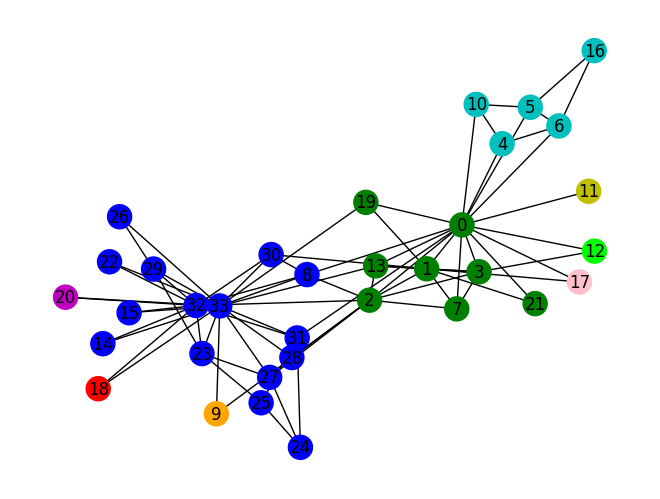

In [1]:

# graph partitioning
# partition ---> represents the nodes


import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

def spectral_partitioning(G, num_partitions):
    # Compute the Laplacian matrix
    L = nx.laplacian_matrix(G).toarray()
    
    # Compute the eigenvectors corresponding to the smallest eigenvalues
    eigenvalues, eigenvectors = np.linalg.eigh(L)
    smallest_indices = np.argsort(eigenvalues)[:num_partitions]
    partition_vectors = eigenvectors[:, smallest_indices]
    
    # Use k-means clustering to partition the nodes based on the eigenvectors
    from sklearn.cluster import KMeans
    kmeans = KMeans(n_clusters=num_partitions, random_state=0)
    partition_labels = kmeans.fit_predict(partition_vectors)
    
    return partition_labels

def visualize_partitioned_graph(G, partition_labels):
    pos = nx.spring_layout(G)
    colors = ['r', 'g', 'b', 'y', 'c', 'm', 'orange', 'pink', 'lime', 'purple']
    partition_color_map = {i: colors[partition_labels[i]] for i in range(len(partition_labels))}
    node_colors = [partition_color_map[i] for i in range(len(G.nodes))]
    
    nx.draw(G, pos, node_color=node_colors, with_labels=True)
    plt.show()

# Example usage
G = nx.karate_club_graph()
num_partitions = 9  # Adjust the number of partitions here
partition_labels = spectral_partitioning(G, num_partitions)
visualize_partitioned_graph(G, partition_labels)


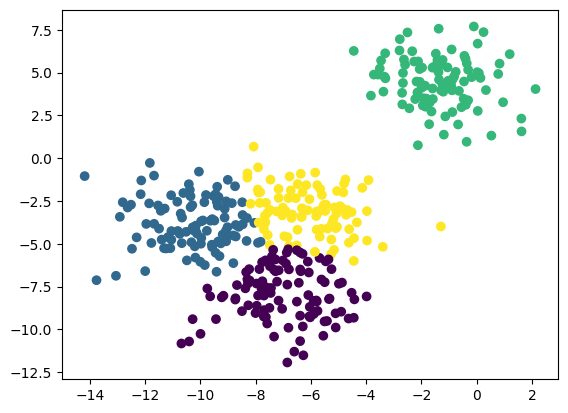

SpectralClustering(n_clusters=4)


In [2]:

# graph Clustering
# Cluster ---> represents the data points

from spectralcluster import SpectralClusterer
from sklearn.cluster import SpectralClustering
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from numpy import random


sc=SpectralClustering(n_clusters=4).fit(x)
SpectralClustering(affinity='rbf', assign_labels='kmeans', coef0=1, degree=3,
                   eigen_solver=None, eigen_tol=0.0, gamma=1.0,
                   kernel_params=None, n_clusters=4, n_components=None,
                   n_init=10, n_jobs=None, n_neighbors=10, random_state=None)
labels = sc.labels_
plt.scatter(x[:,0], x[:,1], c=labels)
plt.show()

print(sc)

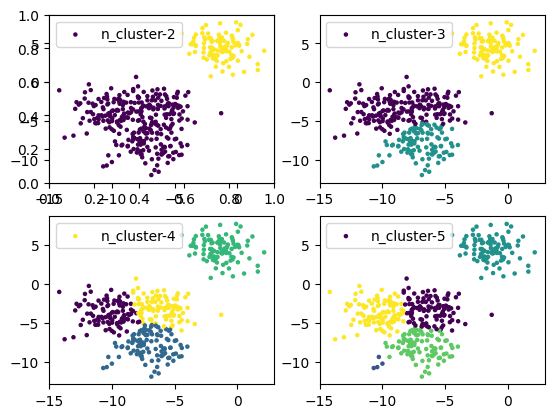

In [3]:

# graph Clustering
# Cluster ---> represents the data points

from spectralcluster import SpectralClusterer
from sklearn.cluster import SpectralClustering
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from numpy import random


f = plt.figure()
f.add_subplot(2, 2, 1)
for i in range(2, 6):
 sc = SpectralClustering(n_clusters=i).fit(x)
 f.add_subplot(2, 2, i-1)
 plt.scatter(x[:,0], x[:,1], s=5, c=sc.labels_, label="n_cluster-"+str(i))
 plt.legend()
plt.show()